In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm import tqdm
import keras as ks
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical



2024-11-29 21:23:59.788286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#randomise the set the image is taken from
type_select=random.randint(1,3)
if(type_select==3):
    db_set='val/'
elif(type_select==2):
    db_set='train/'
elif(type_select==1):
    db_set='test/'

In [4]:
#init image database path
db_path='./triple_mnist/'

#combine set with db path
set_path=db_path+db_set

#create list of all subfolders in set
sub_folders=os.listdir(set_path)

#init images array
imgs=[]

for i in range(5):
    #select random subfolder and get pathname
    subfolder=random.choice(sub_folders)
    subfolder_path = os.path.join(set_path, subfolder)

    #select random image and get pathname
    img=random.choice(os.listdir(subfolder_path))
    img_path=os.path.join(subfolder_path, img)

    #open image and add to array
    img=Image.open(img_path)
    imgs.append((img, subfolder))


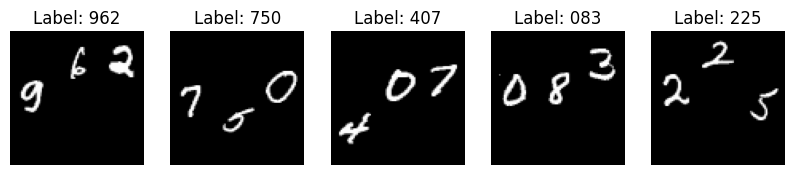

In [89]:
#display images using matplotlib
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(imgs, start=1):
    plt.subplot(1, len(imgs), i)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


In [86]:
db_path='./triple_mnist/'

def flatten_toarray(set):
    set_path=db_path+set
    sub_folders=os.listdir(set_path)

    imgs=[]
    labels=[]

    for folder in sub_folders:
        subfolder_path = os.path.join(set_path, folder)

        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)

            flattened_img = (Image.open(img_path)).resize((45, 45))
            flattened_img = (np.array((flattened_img).convert('L')))

            imgs.append(flattened_img)
            labels.append(int(folder))



    return np.array(imgs), np.array(labels)


train_imgs, train_labels = flatten_toarray('train')
test_imgs, test_labels = flatten_toarray('test')
val_imgs, val_labels = flatten_toarray('val')

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0
val_imgs = val_imgs / 255.0

In [141]:
all_imgs = np.vstack(((train_imgs, test_imgs, val_imgs)))
all_labels = np.vstack(((train_labels.reshape(train_labels.shape[0], -1), test_labels.reshape(test_labels.shape[0], -1),val_labels.reshape(val_labels.shape[0], -1))))

In [100]:
sp_train_imgs, sp_test_imgs, sp_train_labels, sp_test_labels = train_test_split(
    all_imgs, all_labels, test_size=0.2, random_state=42
)

sp_train_imgs, sp_val_imgs, sp_train_labels, sp_val_labels = train_test_split(
    sp_train_imgs, sp_train_labels, test_size=0.25, random_state=42
) 

print(f"Training set size: {train_imgs.shape[0]}")
print(f"Validation set size: {val_imgs.shape[0]}")
print(f"Test set size: {test_imgs.shape[0]}")

Training set size: 64000
Validation set size: 16000
Test set size: 20000


In [101]:
sp_log_reg = LogisticRegression(max_iter=1000)

sp_log_reg.fit(sp_train_imgs.reshape(sp_train_imgs.shape[0], -1), sp_train_labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [104]:
# Evaluate the model on the training set
sp_train_score = sp_log_reg.score(sp_train_imgs.reshape(sp_train_imgs.shape[0], -1), sp_train_labels)
print(f'Training Accuracy: {sp_train_score:.4f}')

# Evaluate the model on the validation set
sp_val_score = sp_log_reg.score(sp_val_imgs.reshape(sp_val_imgs.shape[0], -1), sp_val_labels)
print(f'Validation Accuracy: {sp_val_score:.4f}')

# Evaluate the model on the test set
sp_test_score = sp_log_reg.score(sp_test_imgs.reshape(sp_test_imgs.shape[0], -1), sp_test_labels)
print(f'Test Accuracy: {sp_test_score:.4f}')

Training Accuracy: 0.9497
Validation Accuracy: 0.0296
Test Accuracy: 0.0317


In [124]:
# Reshape the test images to match the input format of the model
sp_test_imgs_reshaped = sp_test_imgs.reshape(sp_test_imgs.shape[0], -1)

# Predict the labels for the test data
sp_test_predictions = sp_log_reg.predict(sp_test_imgs_reshaped)

# Compute and display accuracy
accuracy = accuracy_score(sp_test_labels, sp_test_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(sp_test_labels, sp_test_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(sp_test_labels, sp_test_predictions)

Accuracy: 0.03

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.05      0.04        20
           1       0.19      0.19      0.19        21
           2       0.08      0.03      0.05        30
           3       0.06      0.05      0.05        22
           4       0.25      0.17      0.21        23
           5       0.23      0.22      0.22        23
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        22
           8       0.04      0.07      0.05        15
           9       0.11      0.08      0.09        24
          10       0.17      0.24      0.20        17
          11       0.12      0.14      0.13        22
          12       0.10      0.09      0.10        22
          13       0.05      0.05      0.05        21
          14       0.18      0.10      0.12        21
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.0

True Positives (TP): 1
False Positives (FP): 24
True Negatives (TN): 19956
False Negatives (FN): 19
Accuracy: 0.9979
Precision: 0.0400
Recall: 0.0500
F1-Score: 0.0444


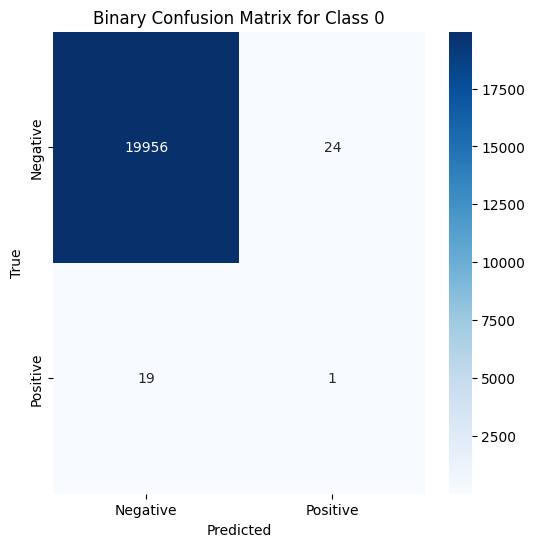

In [127]:
# Convert multi-class predictions to binary (positive = class '0')
def convert_to_binary(predictions, target_class=0):
    return (predictions == target_class).astype(int)

# Convert test predictions and labels to binary for the target class
binary_test_pred = convert_to_binary(sp_test_predictions, target_class=0)
binary_test_labels = convert_to_binary(sp_test_labels, target_class=0)

# Generate confusion matrix (binary)
conf_matrix = confusion_matrix(binary_test_labels, binary_test_pred)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Print the confusion matrix details
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Calculate accuracy and other metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Binary Confusion Matrix for Class 0')
plt.show()


In [9]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(train_imgs.reshape(train_imgs.shape[0], -1), train_labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [193]:
# Reshape the test images to match the input format of the model
test_imgs_reshaped = test_imgs.reshape(test_imgs.shape[0], -1)

# Predict the labels for the test data
test_pred = log_reg.predict(test_imgs_reshaped)
sp_test_pred = sp_log_reg.predict(test_imgs_reshaped)

# Compute and display accuracy
accuracy = accuracy_score(test_labels, test_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
# print(classification_report(test_labels, test_pred))

# Confusion matrix
# conf_matrix = confusion_matrix(test_labels, test_pred)

# Display confusion matrix
print("\nConfusion Matrix:")
# print(conf_matrix)


Accuracy: 0.00

Classification Report:


ValueError: Mix of label input types (string and number)

In [66]:
# Step 1: Convert predictions to binary (correct/incorrect)
# We will assume "correct" is when the predicted label matches the true label.

# Create binary arrays: 1 for correct, 0 for incorrect
binary_test_pred = (test_pred == test_labels).astype(int)

# Now, compute the confusion matrix
conf_matrix = confusion_matrix(binary_test_pred, np.ones_like(binary_test_pred))

# Step 2: Calculate TP, FP, TN, FN from the confusion matrix
# The confusion matrix will look like:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix.ravel()

# Output the results
print(f'True Positives (TP): {tp}')
print(f'False Positives (FP): {fp}')
print(f'True Negatives (TN): {tn}')
print(f'False Negatives (FN): {fn}')

# Calculate accuracy as a bonus
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Accuracy: {accuracy * 100:.2f}%')

NameError: name 'sp_test_pred' is not defined

True Positives (TP): 0
False Positives (FP): 19980
True Negatives (TN): 20
False Negatives (FN): 0
Accuracy: 0.0010
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


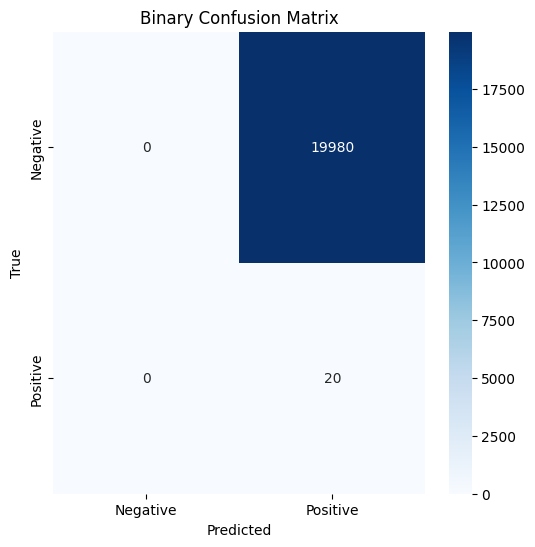

In [195]:
# Convert multi-class predictions to binary (positive = class '0')
def convert_to_binary(predictions, target_class=0):
    return (predictions == target_class).astype(int)

binary_test_pred = convert_to_binary(sp_test_pred, target_class=0)
binary_test_labels = convert_to_binary(sp_test_labels, target_class=0)

# Generate confusion matrix (binary)
conf_matrix = confusion_matrix(binary_test_labels, np.ones_like(binary_test_pred))

# Extract TP, FP, TN, FN
TP, FP, FN, TN = conf_matrix.ravel()

# Print the confusion matrix details
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

# Calculate accuracy and other metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Binary Confusion Matrix')
plt.show()

In [178]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1000, activation='softmax'))

# compile model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 43, 43, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 21, 21, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 3, 3, 64)        

In [180]:
# CNN Model Architecture (renamed to model2)
model2 = models.Sequential()

# Conv Layer Block 1
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Conv Layer Block 2
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Conv Layer Block 3
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))

# Flatten the output of the last convolutional layer
model2.add(layers.Flatten())

# Fully Connected (Dense) Layer
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.5))

# Output Layer
model2.add(layers.Dense(1000, activation='softmax'))  

In [157]:
sp_cnn_train_imgs = sp_train_imgs[:, :, :, np.newaxis]
sp_cnn_val_imgs = sp_val_imgs[:, :, :, np.newaxis]
sp_cnn_test_imgs = sp_test_imgs[:, :, :, np.newaxis]

print(f"cnn_train_imgs shape: {sp_cnn_train_imgs.shape}")
print(f"cnn_test_imgs shape: {sp_cnn_val_imgs.shape}")


print(sp_train_labels.shape)
print(sp_val_labels.shape)

print(len(sp_train_labels))

cnn_train_imgs shape: (60000, 45, 45, 1)
cnn_test_imgs shape: (20000, 45, 45, 1)
(60000, 1)
(20000, 1)
60000


In [129]:
cnn_train_imgs = train_imgs[:, :, :, np.newaxis]
cnn_val_imgs = val_imgs[:, :, :, np.newaxis]
cnn_test_imgs = test_imgs[:, :, :, np.newaxis]

print(f"cnn_train_imgs shape: {cnn_train_imgs.shape}")
print(f"cnn_test_imgs shape: {cnn_val_imgs.shape}")


print(train_labels.shape)
print(val_labels.shape)

print(len(train_labels))

cnn_train_imgs shape: (64000, 45, 45, 1)
cnn_test_imgs shape: (16000, 45, 45, 1)
(64000,)
(16000,)
64000


In [181]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(sp_cnn_train_imgs, sp_train_labels, epochs=20, batch_size=64,
                    validation_data=(sp_cnn_val_imgs, sp_val_labels))

Epoch 1/20
938/938 [==============================] - 106s 111ms/step - loss: 6.4655 - accuracy: 0.0052 - val_loss: 5.0891 - val_accuracy: 0.0243
Epoch 2/20
938/938 [==============================] - 102s 108ms/step - loss: 4.0745 - accuracy: 0.0769 - val_loss: 2.9947 - val_accuracy: 0.1646
Epoch 3/20
938/938 [==============================] - 97s 103ms/step - loss: 2.9238 - accuracy: 0.1760 - val_loss: 2.4137 - val_accuracy: 0.2392
Epoch 4/20
938/938 [==============================] - 96s 103ms/step - loss: 2.4895 - accuracy: 0.2312 - val_loss: 2.1487 - val_accuracy: 0.2837
Epoch 5/20
938/938 [==============================] - 96s 103ms/step - loss: 2.2426 - accuracy: 0.2721 - val_loss: 1.9782 - val_accuracy: 0.3143
Epoch 6/20
938/938 [==============================] - 98s 104ms/step - loss: 2.0896 - accuracy: 0.2989 - val_loss: 1.8681 - val_accuracy: 0.3295
Epoch 7/20
938/938 [==============================] - 93s 99ms/step - loss: 1.9745 - accuracy: 0.3243 - val_loss: 1.7667 - val_a

In [190]:
# Get predictions
predictions = model.predict(sp_cnn_test_imgs)

625/625 [==============================] - 6s 10ms/step


Test loss: 0.8411468863487244
Test accuracy: 0.7390999794006348
Accuracy: 0.0010
F1 Score (Macro Average): 0.0000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

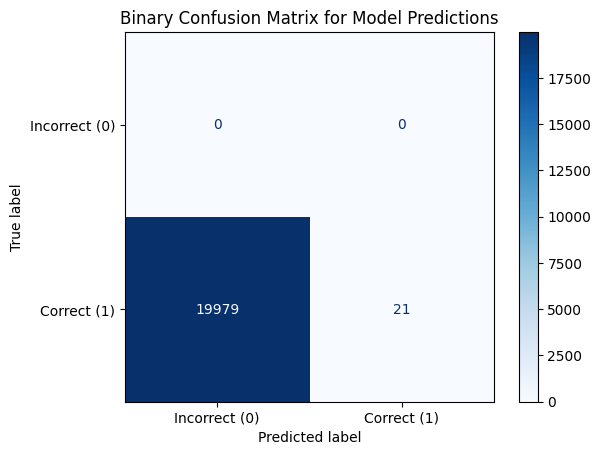

In [192]:
score = model.evaluate(sp_cnn_test_imgs, sp_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Convert predictions to class labels (multiclass prediction to single class index)
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to single class index (if needed)
true_labels = np.argmax(sp_test_labels, axis=1)

# Convert to binary classification
# Correctly predicted = 1, Incorrectly predicted = 0
binary_predictions = (predicted_labels == true_labels).astype(int)

# True binary labels
binary_true_labels = np.ones_like(binary_predictions)  # True labels are all "correct" (1)

# Compute confusion matrix
conf_matrix = confusion_matrix(binary_true_labels, binary_predictions, labels=[0, 1])

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute F1 Score (macro-average across classes)
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Classification report: precision, recall, f1-score for each class
class_report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(999)])

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro Average): {f1:.4f}")
# print("\nClassification Report:\n", class_report)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Incorrect (0)', 'Correct (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Binary Confusion Matrix for Model Predictions')
plt.show()


In [ ]:
cnn_train_imgs = train_imgs[:, :, :, np.newaxis]
cnn_val_imgs = val_imgs[:, :, :, np.newaxis]
cnn_test_imgs = test_imgs[:, :, :, np.newaxis]

print(f"cnn_train_imgs shape: {cnn_train_imgs.shape}")
print(f"cnn_test_imgs shape: {cnn_val_imgs.shape}")


print(train_labels.shape)
print(val_labels.shape)

print(len(train_labels))

cnn_train_imgs shape: (64000, 45, 45, 1)
cnn_test_imgs shape: (16000, 45, 45, 1)
(64000,)
(16000,)
64000


In [ ]:
for i in range(5):
    #select random subfolder and get pathname
    subfolder=random.choice(sub_folders)
    subfolder_path = os.path.join(set_path, subfolder)

    #select random image and get pathname
    img=random.choice(os.listdir(subfolder_path))
    img_path=os.path.join(subfolder_path, img)

    #open image and add to array
    img=Image.open(img_path)
    imgs.append((img, subfolder))
    
#display images using matplotlib
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(imgs, start=1):
    plt.subplot(1, len(imgs), i)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


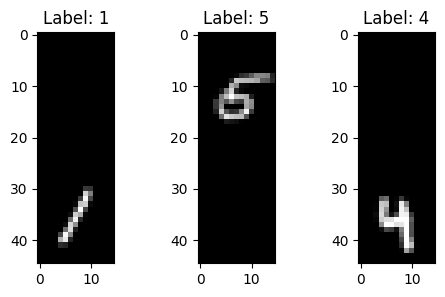

In [61]:
#randomise the set the image is taken from
type_select=random.randint(1,3)
if(type_select==3):
    db_set='val/'
elif(type_select==2):
    db_set='train/'
elif(type_select==1):
    db_set='test/'

#init image database path
db_path='./triple_mnist/'

#combine set with db path
set_path=db_path+db_set

#create list of all subfolders in set
sub_folders=os.listdir(set_path)

#select random subfolder and get pathname
subfolder=random.choice(sub_folders)
subfolder_path = os.path.join(set_path, subfolder)

#select random image and get pathname
img=random.choice(os.listdir(subfolder_path))
test_img_path=os.path.join(subfolder_path, img)

test_img=Image.open(test_img_path).convert('L').resize((45,45))

split_width = test_img.size[0] // 3

test_splits= [
    test_img.crop((i * split_width, 0 , (i+1) * split_width, test_img.size[1]))
    for i in range(3)
]

plt.figure(figsize=(10,3))
for i, split in enumerate(test_splits):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_splits[i], cmap='gray')
    plt.title(f'Label: {subfolder[i]}')

plt.show()


In [65]:
db_path='./triple_mnist/'

def splits_flatten_toarray(set):
    set_path=db_path+set
    sub_folders=os.listdir(set_path)

    imgs=[]
    labels=[]

    for folder in sub_folders:
        subfolder_path = os.path.join(set_path, folder)

        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)

            img = Image.open(img_path).convert('L').resize((45,45))
            
            width, height = img.size
            
            split_width = width // 3

            splits = [
                img.crop((i * split_width, 0, (i + 1) * split_width, height))
                for i in range(3)
            ]

            for i, split in enumerate(splits):
                imgs.append(np.array(split))  
                labels.append(int(folder[i]))

    return np.array(imgs), np.array(labels)


t_train_imgs, t_train_labels = splits_flatten_toarray('train')
t_test_imgs, t_test_labels = splits_flatten_toarray('test')
t_val_imgs, t_val_labels = splits_flatten_toarray('val')

t_train_imgs = t_train_imgs / 255.0
t_test_imgs = t_test_imgs / 255.0
t_val_imgs = t_val_imgs / 255.0

In [154]:
print(t_train_imgs.shape)

(192000, 45, 15, 1, 1)


In [76]:
def build_cnn_basic():
    t_model = models.Sequential()
    t_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 15, 1)))
    t_model.add(layers.MaxPooling2D((2, 2)))

    t_model.add(layers.Flatten())
    t_model.add(layers.Dropout(0.5))
    t_model.add(layers.Dense(100, activation='relu'))
    t_model.add(layers.Dense(10, activation='softmax'))

    t_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # compile model
    return t_model

In [114]:
def build_cnn_comp():
   # CNN Model Architecture (Adjusted Padding)
    model2 = models.Sequential()

    # Conv Layer Block 1
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(45, 15, 1)))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Dropout(0.3))

    # Conv Layer Block 2
    model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Dropout(0.3))

    # Conv Layer Block 3
    model2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Dropout(0.3))

    # Flatten the output of the last convolutional layer
    model2.add(layers.Flatten())

    # Fully Connected (Dense) Layer
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.5))

    # Output Layer
    model2.add(layers.Dense(10, activation='softmax'))  

   #  model2.summary()


    model2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # compile model
    return model2

In [74]:
t_train_imgs = t_train_imgs[:, :, :, np.newaxis]
t_val_imgs = t_val_imgs[:, :, :, np.newaxis]
t_test_imgs = t_test_imgs[:, :, :, np.newaxis]

print(f"t_train_imgs shape: {t_train_imgs.shape}")
print(f"t_test_imgs shape: {t_val_imgs.shape}")


print(t_train_labels.shape)
print(t_val_labels.shape)

print(len(t_train_labels))

t_train_imgs shape: (192000, 45, 15, 1, 1)
t_test_imgs shape: (48000, 45, 15, 1, 1)
(192000,)
(48000,)
192000


In [115]:
t_models = []
for i in range(3):
    print(f"Training model for digit {i+1}")
    t_model = build_cnn_comp()
    t_model.fit(t_train_imgs[i::3], t_train_labels[i::3], epochs=10,
              validation_data=(t_val_imgs[i::3], t_val_labels[i::3]))
    t_models.append(t_model)

Training model for digit 1
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 45, 15, 32)        320       
                                                                 
 batch_normalization_10 (Ba  (None, 45, 15, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 22, 7, 32)         0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 22, 7, 32)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 22, 7, 64)         18496     
                                                                 
 batch_normalization_11 (B

In [117]:
predictions = []
for i, model in enumerate(t_models):
    preds = np.argmax(model.predict(t_test_imgs[i::3]), axis=1)
    predictions.append(preds)

all_preds = np.array(predictions).T

625/625 [==============================] - 9s 15ms/step


In [118]:
# Combine true labels into a single array for comparison
test_labels_combined = np.array([int(str(label).zfill(3)) for label in t_test_labels])
predicted_labels_combined = np.array([int("".join(map(str, pred))) for pred in all_preds])

# Metrics
accuracy = accuracy_score(test_labels, predicted_labels_combined)
f1 = f1_score(test_labels, predicted_labels_combined, average='macro')
conf_matrix = confusion_matrix(test_labels, predicted_labels_combined)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
# print("Confusion Matrix:")
# print(conf_matrix)


Accuracy: 0.9640
F1 Score: 0.3621


In [97]:
print(test_labels_combined.shape)
print(predicted_labels_combined.shape)

(60000,)
(20000,)
(20000,)


Test loss: [0.05998226 0.04044513 0.03359785]
Test accuracy: [0.98570001 0.98834997 0.9896    ]
Accuracy: 0.9640
F1 Score (Macro Average): 0.3621


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

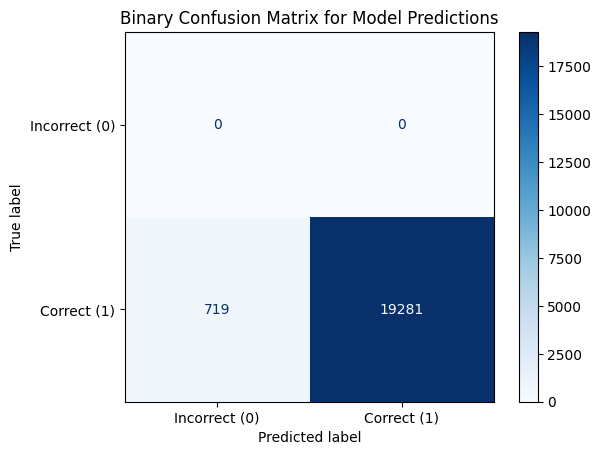

In [120]:
evals = []
for i, model in enumerate(t_models):
    eval = model.evaluate(t_test_imgs[i::3], t_test_labels[i::3], verbose=0)
    evals.append(eval)

score = np.array(evals).T

print("Test loss:", score[0])
print("Test accuracy:", score[1])


# Correctly predicted = 1, Incorrectly predicted = 0
binary_predictions = (predicted_labels_combined == test_labels).astype(int)

# True binary labels
binary_true_labels = np.ones_like(binary_predictions)  # True labels are all "correct" (1)

# Compute confusion matrix
conf_matrix = confusion_matrix(binary_true_labels, binary_predictions, labels=[0, 1])

# Compute accuracy
accuracy = accuracy_score(test_labels, predicted_labels_combined)

# Compute F1 Score (macro-average across classes)
f1 = f1_score(test_labels, predicted_labels_combined, average='macro')

# Classification report: precision, recall, f1-score for each class
class_report = classification_report(test_labels, predicted_labels_combined, target_names=[str(i) for i in range(540)])

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro Average): {f1:.4f}")
# print("\nClassification Report:\n", class_report)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Incorrect (0)', 'Correct (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Binary Confusion Matrix for Model Predictions')
plt.show()


In [177]:

# Generator
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        # Project and reshape
        layers.Dense(8 * 4 * 256, input_dim=latent_dim),
        layers.Reshape((8, 4, 256)),
        
        # Upsample to (15, 6, 128)
        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding="same", activation="relu"),
        layers.BatchNormalization(),
        
        # Upsample to (30, 12, 64)
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", activation="relu"),
        layers.BatchNormalization(),
        
        # Upsample to (45, 15, 32)
        layers.Conv2DTranspose(32, (5, 5), strides=(1, 1), padding="same", activation="relu"),
        layers.BatchNormalization(),
        
        # Output layer: (45, 15, 1)
        layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding="same", activation="tanh")
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        # Initial shape (45, 15, 1)
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=(45, 15, 1)),  # Shape: (23, 8, 64)
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),  # Shape: (12, 4, 128)
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),  # Shape: (6, 2, 256)
        layers.LeakyReLU(0.2),
        layers.Dropout(0.3),

        # Flatten the output
        layers.Flatten(),  # Expected shape after flatten: (6 * 2 * 256 = 3072)
        layers.Dense(512, activation="relu"),  # Dense layer with 512 units
        layers.Dense(1, activation="sigmoid")  # Binary output
    ])
    
    model.summary()  # Check intermediate and final shapes
    return model


# GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model

In [151]:
def train_gan(generator, discriminator, gan, train_images, latent_dim, epochs, batch_size, display_interval):
    """
    Train the GAN model with real and synthetic data while displaying progress.
    Outputs generator and discriminator loss at each epoch.
    """
    for epoch in range(epochs):
        # Train discriminator
        real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]
        real_labels = np.ones((batch_size, 1))
        
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))
        
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
        # Print losses for each epoch
        print(f"Epoch {epoch+1}/{epochs} - D Loss: {d_loss[0]:.4f}, D Acc: {d_loss[1]*100:.2f}%, G Loss: {g_loss:.4f}")


In [152]:
def generate_and_visualize(generator, latent_dim, num_images=16):
    noise = tf.random.normal([num_images, latent_dim])
    generated_images = generator(noise)
    generated_images = (generated_images + 1) / 2.0  # Rescale to [0, 1]
    
    # Visualize
    plt.figure(figsize=(4, 4))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()


In [178]:
# Hyperparameters
latent_dim = 100  # Size of the noise vector
batch_size = 64
epochs = 5
display_interval = 1000

# Instantiate models
generator = build_generator(latent_dim)
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 23, 8, 64)         640       
                                                                 
 leaky_re_lu_39 (LeakyReLU)  (None, 23, 8, 64)         0         
                                                                 
 dropout_71 (Dropout)        (None, 23, 8, 64)         0         
                                                                 
 conv2d_75 (Conv2D)          (None, 12, 4, 128)        73856     
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 12, 4, 128)        0         
                                                                 
 dropout_72 (Dropout)        (None, 12, 4, 128)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 6, 2, 256)       

ValueError: Exception encountered when calling layer "sequential_69" (type Sequential).

Input 0 of layer "dense_62" is incompatible with the layer: expected axis -1 of input shape to have value 3072, but received input with shape (None, 2048)

Call arguments received by layer "sequential_69" (type Sequential):
  • inputs=tf.Tensor(shape=(None, 32, 16, 1), dtype=float32)
  • training=None
  • mask=None

In [145]:
train_gan(generator, discriminator, gan, t_train_imgs, latent_dim, epochs, batch_size, display_interval)

4/4 [==============================] - 1s 99ms/step


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_30" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(128, 45, 15, 1, 1)


In [ ]:
generate_and_visualize(generator, latent_dim)


In [ ]:
# Generate synthetic data
num_synthetic_images = 10000
noise = np.random.normal(0, 1, (num_synthetic_images, latent_dim))
synthetic_images = generator.predict(noise)

# Combine with original training set
augmented_train_images = np.concatenate((t_train_imgs, synthetic_images))
augmented_train_labels = np.concatenate((t_train_labels, t_train_labels[:num_synthetic_images]))


In [ ]:
# Retrain the best model
history = model2.fit(
    augmented_train_images, augmented_train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(cnn_test_imgs, test_labels)
)


In [ ]:
# Evaluate model
test_loss, test_accuracy = model2.evaluate(sp_cnn_test_imgs, test_labels)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Compare performance
# (Manually compare metrics like accuracy, F1 score, etc. between the original and augmented datasets)
